### Описание данных
###### products.csv

product_id - уникальный идентификатор товара

product_name - название товара

aisle_id - уникальный идентификатор подкатегории

department_id - уникальный идентификатор категории

aisle - название подкатегории

department - название категории


###### transactions.csv

order_id - уникальный идентификатор транзакции

user_id - уникальный идентификатор покупателя

order_number - номер транзакции в истории покупок данного пользователя

order_dow - день недели транзакции

order_hour_of_day - час совершения транзакции

days_since_prior_order - количество дней с совершения предыдущей транзакции данным пользователем

product_id - уникальный идентификатор товара

add_to_cart_order - номер под которым данный товар был добавлен в корзину

reordered - был ли товар "перезаказан"

In [159]:
#импортируем данные
import pandas as pd
import numpy as np
import missingno as msno

In [160]:
#загрузим датасет с транзакциями
transactions = pd.read_csv('./transactions.csv')
#отсортируем датасет
transactions.sort_values('order_id',inplace=True)

In [161]:
#загрузим датасет с продуктами
product = pd.read_csv('./products.csv')

<AxesSubplot:>

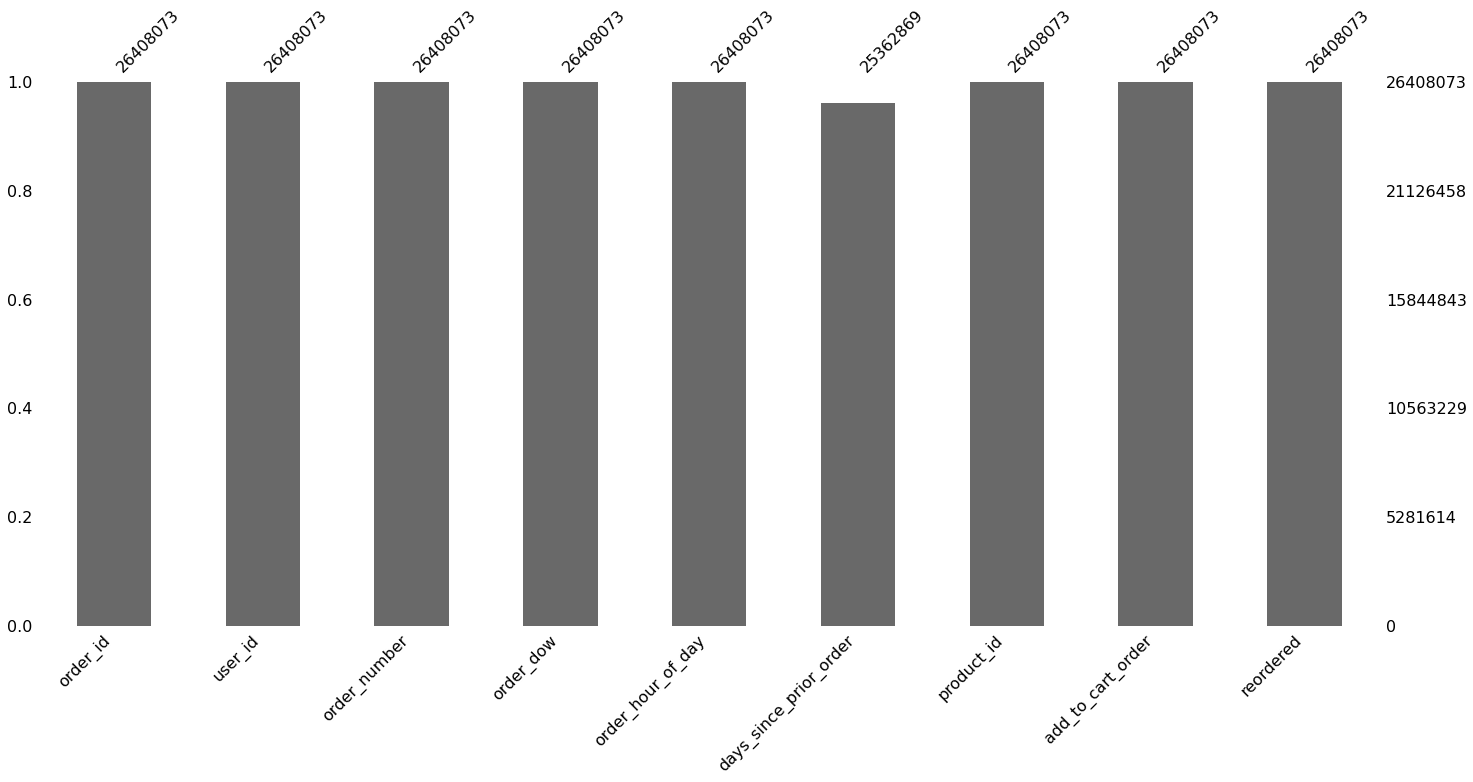

In [162]:
#проверим данные на пропуски
msno.bar(transactions)

In [ ]:
#проверим данные на пропуски
msno.bar(transactions)

<AxesSubplot:>

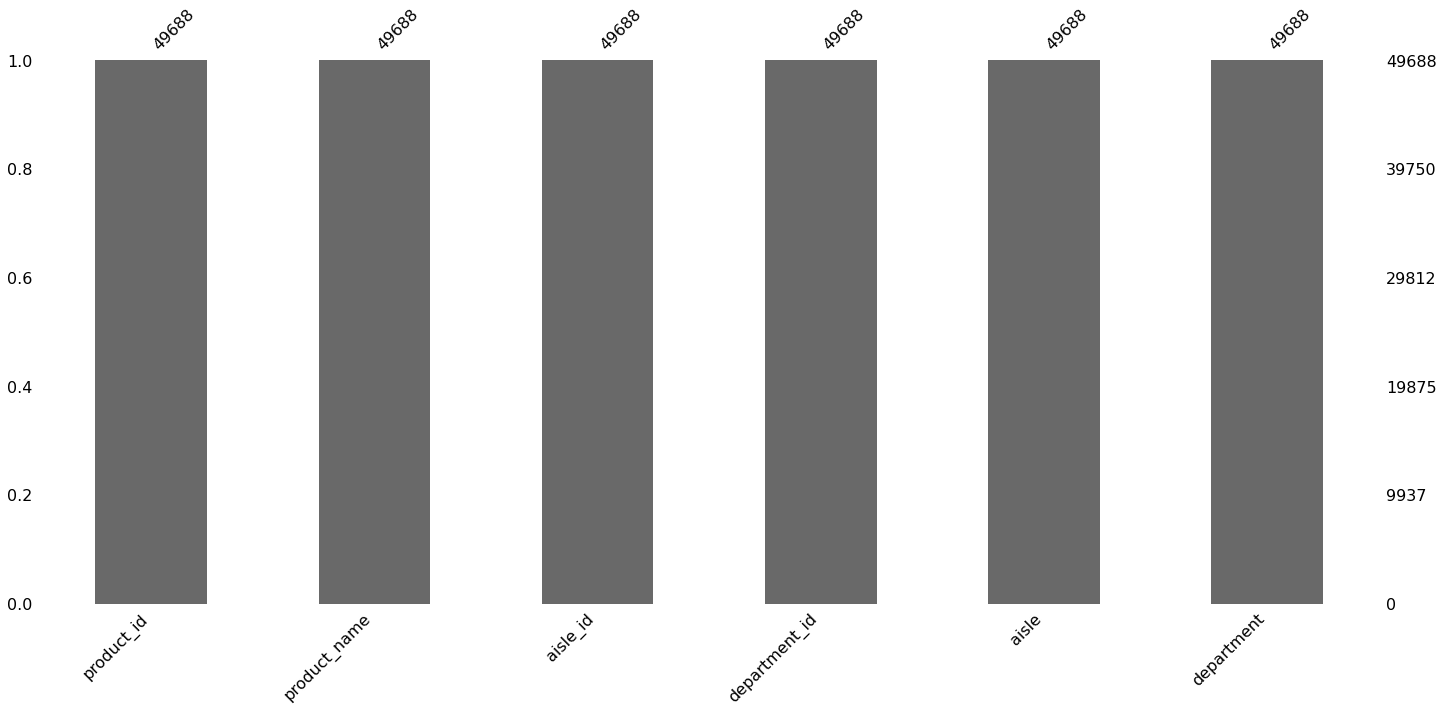

In [163]:
#проверим данные на пропуски
msno.bar(product)

In [164]:
#наблюдаем пропуски в days_since_prior_order, изучим более подробнее

In [170]:
#получим всех пользователей с 1 транзакцией и посчитаем их количество
len(transactions[transactions['order_number'] == 1])

1045204

In [171]:
#посчитаем количество пропусков у данных пользователей
transactions[transactions['order_number'] == 1].days_since_prior_order.isnull().sum()

1045204

In [ ]:
#видим что количество NaN и количество транзакций совпадает, исходя из этого делаем вывод, что когда у пользователя
#идет первая транзакция у нас первое значение это NAN
#проверим есть ли 0 в поле days_since_prior_order, если их нет, то заменим NaN на 0, если есть заменим на -1

In [173]:
#проверим присутсвуют ли 0 
transactions[transactions['days_since_prior_order'] == 0]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
24822858,24,193635,19,0,14,0.0,46175,3.0,0.0
24822857,24,193635,19,0,14,0.0,9065,2.0,0.0
24822856,24,193635,19,0,14,0.0,40078,1.0,0.0
4848360,45,37913,55,1,14,0.0,16349,1.0,1.0
19592978,73,152590,13,0,12,0.0,21903,4.0,1.0
...,...,...,...,...,...,...,...,...,...
11456945,3420973,89012,75,5,23,0.0,24497,8.0,0.0
11456941,3420973,89012,75,5,23,0.0,31805,4.0,0.0
11456942,3420973,89012,75,5,23,0.0,45763,5.0,1.0
11456939,3420973,89012,75,5,23,0.0,37687,2.0,1.0


In [174]:
#проверим присутсвуют ли -1
transactions[transactions['days_since_prior_order'] == -1]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered


In [175]:
#заменим NaN в столбце days_since_prior_order на -1
transactions.days_since_prior_order.fillna(-1,inplace=True)

In [176]:
#посчитаем количество пропусков у данных пользователей
transactions[transactions['order_number'] == 1].days_since_prior_order.isnull().sum()

0

In [ ]:
#посмотрим на типы данных

In [177]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26408073 entries, 26379536 to 3237899
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
dtypes: float64(3), int64(6)
memory usage: 2.0 GB


In [ ]:
#видим, что типы данных числовые, строк нет

In [179]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [180]:
#в продукт ничего странного не наблюдаем

In [ ]:
#обьеденим датасеты по product_id

In [181]:
df_merge = transactions.merge(product,how='inner',left_on='product_id',right_on='product_id')

In [182]:
#получим количество уникальных пользователей
df_merge.user_id.nunique()

100000

In [183]:
#получим количество уникальных товаров
df_merge.product_id.nunique()

49465

In [186]:
#получим топ покупающих товаров
top_product = df_merge.groupby('product_name',as_index=False).agg({'product_id':'count'}).sort_values(by='product_id',ascending=False)

In [192]:
top_product.describe()

,product_id
count,49465.000000
mean,533.873911
std,3999.570505
min,1.000000
25%,13.000000
50%,46.000000
75%,204.000000
max,391170.000000


In [ ]:
#наблюдаем, что медианное количество раз которое покупают один товар, составляет 46, но например бананы купили более 391170 раз

In [196]:
#посчитаем топ пользователей по чекам
top_users = df_merge.groupby('user_id',as_index=False).agg({'order_number':'nunique'}).sort_values(by='order_number',ascending=False)

In [197]:
top_users.describe()

,user_id,order_number
count,100000.000000,100000.000000
mean,102963.371060,26.036720
std,59484.533383,18.469221
min,1.000000,9.000000
25%,51470.750000,13.000000
50%,102783.500000,19.000000
75%,154334.500000,32.000000
max,206209.000000,99.000000


In [ ]:
#наблюдаем, что медианное количество чеков по пользователю составляет 19

In [200]:
#посмотрим сколько уникальных товаров покупают пользователи
pur_product_count = df_merge.groupby('user_id',as_index=False).agg({'product_id':'nunique'}).sort_values(by='product_id',ascending=False)

In [201]:
#медианное количество уникальынх товаров за весь срок жизни пользователя, составляет 82
pur_product_count.describe()

,user_id,product_id
count,100000.000000,100000.000000
mean,102963.371060,94.590650
std,59484.533383,63.865957
min,1.000000,1.000000
25%,51470.750000,49.000000
50%,102783.500000,82.000000
75%,154334.500000,125.000000
max,206209.000000,726.000000


In [205]:
#посмотрим какие товары чаще всего перезаказывают
product_reordered = df_merge.groupby('product_name',as_index=False).agg({'reordered':'sum'}).sort_values(by='reordered',ascending=False)

In [207]:
#посмотрим сколько товаров не перезаказывали совсем
product_reordered[product_reordered['reordered'] == 0]

,product_name,reordered
12313,Decorating Icing,0.0
21192,Italian Herbs Paste,0.0
21793,Kettle Cooked Roasted Black Garlic Potato Chips,0.0
49031,Y Shaped Peeler,0.0
47668,Volum' Express® The Colossal Glam Black Waterp...,0.0
...,...,...
4877,Blood Orange Cocktail Mixer,0.0
19798,High Potency D3-1000IU Softgels,0.0
35854,Premium Soy Sauce,0.0
19796,High Performance Odor Elimination Power Rush ...,0.0


In [209]:
#посмотрим сколько товаров перезаказывали
product_reordered[product_reordered['reordered'] > 0]

,product_name,reordered
3660,Banana,347066.0
3456,Bag of Organic Bananas,280724.0
31795,Organic Strawberries,186420.0
28723,Organic Baby Spinach,164673.0
30176,Organic Hass Avocado,154014.0
...,...,...
6728,Carpet & Rug Shampoo Concentrate,1.0
36791,Quince Preserve,1.0
36225,Protein Oatmeal Maple Pecan Crunch,1.0
23981,Mach3 Razor Replacement Cartridges,1.0


In [214]:
#посмотрим на топ покупок по категории
pur_count_department = df_merge.groupby(['department'],as_index=False).agg({'order_id':'nunique'}).sort_values(by='order_id',ascending=False)
pur_count_department.head()

,department,order_id
19,produce,1972718
7,dairy eggs,1784004
3,beverages,1183198
20,snacks,1135734
10,frozen,947533


In [213]:
#посмотрим на топ покупок по подкатегории
pur_count_aisle = df_merge.groupby(['aisle'],as_index=False).agg({'order_id':'nunique'}).sort_values(by='order_id',ascending=False)
pur_count_aisle.head()

,aisle,order_id
50,fresh fruits,1479065
53,fresh vegetables,1164325
98,packaged vegetables fruits,965741
133,yogurt,700709
83,milk,660656


In [218]:
#посмотрим в разреpt пользователь/товар и посчитаем количество перезаказов
user_product_count_reordered = df_merge.groupby(['user_id','product_id'],as_index=False).agg({'reordered':'sum'}).sort_values(by=['user_id','reordered'],ascending=False)

In [225]:
len(user_product_count_reordered[user_product_count_reordered['reordered'] == 0])

5257939

In [227]:
len(user_product_count_reordered[user_product_count_reordered['reordered'] != 0])

4201126

In [ ]:
#исходя из выше полученных данных, можем сказать что пользователи примерно 40% товаров перезаказывают

In [233]:
#посчитаем среднее время между покупками в днях
df_merge.groupby('user_id').agg({'days_since_prior_order':'mean'}).describe()

,days_since_prior_order
count,100000.000000
mean,11.203458
std,4.619992
min,0.268164
25%,7.583518
50%,10.759036
75%,14.436219
max,29.074627


In [236]:
#посчитаем в какие дни чаще больше всего количество покупок
df_merge.groupby('order_dow').agg({'order_id':'nunique'})

,order_id
order_dow,
0,442626
1,453591
2,359349
3,335645
4,328572
5,349165
6,334724


Всего уникальных пользователей - 100 00

Всего уникальных товаров - 49 465

Медианное количество чеков по пользователю - 19

Медианное количество уникальных товаров в разрезе пользователя составляет - 82

Большенство товаров перезаказывали хотя бы 1 раз, 5348 позиции не перезаказывали совсем

Топ товары которые купили составляют органические ( фрукты/овощи ) из них лидер бананы, наблюдаем что суммарно бананы купили 627790 а клубнику 186420 раз, очень большой разравы между цифрами это можно очень исказить модель.

Топ покупок по подкатегориям составляют фрукты и овощи.

Каждый пользователь примерно 40% корзины перезаказывает.

Медианное время между покупками составляет - 11 дней.

Дни по которым больше всего покупок это 1 и 0, предположим, что 0 это суббота, 1 это воскресенье.